In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Several Preprocessing Method to Modeling at once Part 2 : Decision Tree   
data : adult.csv

target : income  
preprocess:  
missing value : simple imputer with constant  
one hot encoding : relationship, race, sex  
binary encoding : workclass, marital status, occupation, native country    
ordinal encoding : education (already encoded)  
no treatment : numerical  
out : fnlwgt  
Random state 10, data splitting 70:30 model Tree(max depth 5, criterion entropy)    

## data   
An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.  
Fields:  
The dataset contains 16 columns  
Target filed: Income  
-- The income is divide into two classes: 50K  
Number of attributes: 14  
-- These are the demographics and other  
features to describe a person  

We will explore the possibility in predicting income level based on the individual’s personal information.

## Data Description

In [10]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [56]:
df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [55]:
df['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [3]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Prepocessing

y=income  
x=relationship, race, sex, workclass, marital status, occupation, native country, education (already encoded)  
one hot encoding : relationship, race, sex  
binary encoding : workclass, marital status, occupation, native country  
ordinal encoding : education (already encoded)

> ## Missing value : simple imputer with constant

In [5]:
df.replace('?',np.nan,inplace=True)
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer

one hot encoding : relationship, race, sex  
binary encoding : workclass, marital status, occupation, native country  
ordinal encoding : education (already encoded)  
no treatment : numerical  
out : fnlwgt

In [60]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce

In [41]:
binary_encoder = Pipeline([
    ('imputer',SimpleImputer(strategy = 'constant',fill_value = 'NC')),
    ('binary encoder',ce.BinaryEncoder())
])


transformer= ColumnTransformer([
    ('one hot',OneHotEncoder(drop='first'),['relationship','race','sex']),
    ('binary', binary_encoder,['workclass','marital.status','occupation','native.country']),
], remainder='passthrough')

In [42]:
transformer.fit_transform(df)

C:\Users\asus\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


array([[1.0, 0.0, 0.0, ..., 4356, 40, '<=50K'],
       [1.0, 0.0, 0.0, ..., 4356, 18, '<=50K'],
       [0.0, 0.0, 0.0, ..., 4356, 40, '<=50K'],
       ...,
       [0.0, 0.0, 0.0, ..., 0, 40, '>50K'],
       [0.0, 0.0, 0.0, ..., 0, 40, '<=50K'],
       [0.0, 0.0, 1.0, ..., 0, 20, '<=50K']], dtype=object)

> ## Data Splitting

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x = df.drop(columns = ['fnlwgt','income','education'])
y = np.where(df['income']=='>50K',1,0)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 10)

In [46]:
x_test

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
11358,22,Private,10,Never-married,Tech-support,Own-child,White,Male,0,0,40,United-States
10859,44,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,35,United-States
30948,27,Local-gov,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
29811,54,Private,9,Never-married,Other-service,Not-in-family,White,Male,0,0,15,United-States
18408,56,Private,8,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
4195,20,Private,10,Never-married,Other-service,Own-child,White,Female,594,0,16,United-States
31217,31,Private,10,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
24768,30,Federal-gov,15,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55,?
19319,37,Private,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States


> ## Data Transform

In [47]:
x_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
29849,20,Private,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States
30319,20,Private,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,55,United-States
1878,47,State-gov,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,50,United-States
20686,50,Self-emp-not-inc,10,Divorced,Exec-managerial,Unmarried,Asian-Pac-Islander,Female,0,0,40,?
26007,39,Private,10,Never-married,Machine-op-inspct,Other-relative,Asian-Pac-Islander,Male,0,0,40,Philippines


In [48]:
x_train_preprocessed = transformer.fit_transform(x_train)
x_test_preprocessed = transformer.transform(x_test)

C:\Users\asus\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [50]:
x_train_preprocessed = pd.DataFrame(x_train_preprocessed)
x_test_preprocessed = pd.DataFrame(x_test_preprocessed)
x_train_preprocessed

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,20.0,10.0,0.0,0.0,10.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,20.0,9.0,0.0,0.0,55.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,47.0,16.0,15024.0,0.0,50.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,50.0,10.0,0.0,0.0,40.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,39.0,10.0,0.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24415,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,31.0,10.0,0.0,0.0,35.0
24416,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,23.0,12.0,0.0,0.0,16.0
24417,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,38.0,11.0,0.0,0.0,40.0
24418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,47.0,9.0,0.0,0.0,40.0


In [51]:
transformer.transformers_

[('one hot', OneHotEncoder(drop='first'), ['relationship', 'race', 'sex']),
 ('binary',
  Pipeline(steps=[('imputer',
                   SimpleImputer(fill_value='NC', strategy='constant')),
                  ('binary encoder', BinaryEncoder())]),
  ['workclass', 'marital.status', 'occupation', 'native.country']),
 ('remainder', 'passthrough', [0, 2, 8, 9, 10])]

In [52]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Not-in-family', 'x0_Other-relative', 'x0_Own-child',
       'x0_Unmarried', 'x0_Wife', 'x1_Asian-Pac-Islander', 'x1_Black',
       'x1_Other', 'x1_White', 'x2_Male'], dtype=object)

In [53]:
transformer.transformers_[1][1]['binary encoder'].get_feature_names()

['0_0',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '1_0',
 '1_1',
 '1_2',
 '1_3',
 '2_0',
 '2_1',
 '2_2',
 '2_3',
 '2_4',
 '3_0',
 '3_1',
 '3_2',
 '3_3',
 '3_4',
 '3_5',
 '3_6']

In [54]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1]['binary encoder'].get_feature_names() + ['age','education.num','capital.gain','capital.loss','hours.per.week']
x_train_preprocessed.columns = features
x_test_preprocessed.columns = features
x_train_preprocessed

,x0_Not-in-family,x0_Other-relative,x0_Own-child,x0_Unmarried,x0_Wife,x1_Asian-Pac-Islander,x1_Black,x1_Other,x1_White,x2_Male,...,3_2,3_3,3_4,3_5,3_6,age,education.num,capital.gain,capital.loss,hours.per.week
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,20.0,10.0,0.0,0.0,10.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,20.0,9.0,0.0,0.0,55.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,47.0,16.0,15024.0,0.0,50.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,50.0,10.0,0.0,0.0,40.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,39.0,10.0,0.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24415,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,31.0,10.0,0.0,0.0,35.0
24416,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,23.0,12.0,0.0,0.0,16.0
24417,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,38.0,11.0,0.0,0.0,40.0
24418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,47.0,9.0,0.0,0.0,40.0


> ## Model fitting and evaluation

In [68]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

In [77]:
tree = DecisionTreeRegressor(max_depth = 5)
tree.fit(x_train_preprocessed, y_train)

DecisionTreeRegressor(max_depth=5)

In [70]:
y_pred = model.predict(x_test_preprocessed)
print('mse:',mean_squared_error(y_test,y_pred))

mse: 0.11231836919245922


> ## Model properties

In [78]:
importance_table=pd.DataFrame({'importance':tree.feature_importances_},index=features)
importance_table

,importance
x0_Not-in-family,0.000000
x0_Other-relative,0.000000
x0_Own-child,0.000000
x0_Unmarried,0.000663
x0_Wife,0.000000
x1_Asian-Pac-Islander,0.000000
x1_Black,0.000000
x1_Other,0.000000
x1_White,0.000000
x2_Male,0.000000


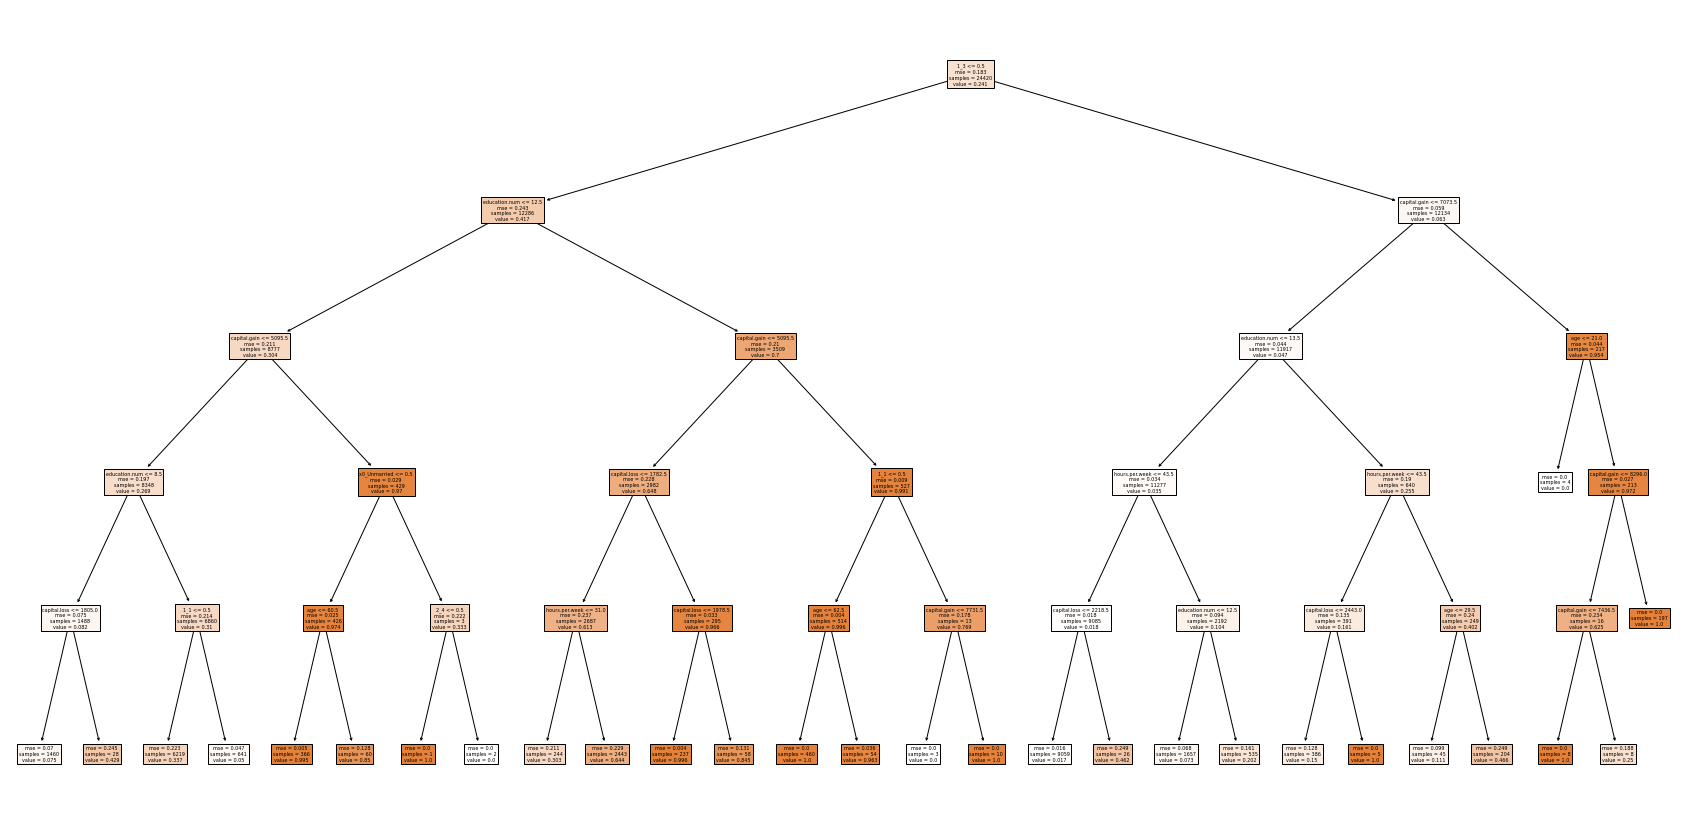

In [86]:
plt.figure(figsize = (30,15))
plot_tree(model, feature_names = features,filled = True, class_names = ['<=50K','>50K'])
plt.show()